# DBSCAN

In [1]:
import sys
sys.path.append("..")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from src.cluster import calculate_k_distances, dbscan_kdist_analysis, \
    assign_dbscan_multidensity

## Read in scaled features

In [2]:
df = pd.read_csv("../data/cohort_features_scaled.csv", index_col="ID")
df.head(5)

,n_stays,admission_age,suspected_infection,weight,height,heart_rate_min,heart_rate_max,temperature_min,temperature_max,mbp_min,...,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,gender_F,gender_M,ventilation_status_HFNC,ventilation_status_InvasiveVent,ventilation_status_NonInvasiveVent,ventilation_status_None,ventilation_status_SupplementalOxygen,ventilation_status_Tracheostomy
ID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.277778,0.0,0.362486,0.671053,0.426357,0.403846,0.818868,0.551402,0.61,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.638889,1.0,0.550055,0.473684,0.558140,0.532051,0.794340,0.598131,0.64,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.000000,0.347222,1.0,0.619411,0.763158,0.550388,0.448718,0.825786,0.644860,0.51,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.638889,1.0,0.334787,0.368421,0.302326,0.442308,0.780503,0.634579,0.43,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.166667,0.750000,0.0,0.383860,0.736842,0.271318,0.410256,0.808805,0.551402,0.41,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
# Drop irrelevant features
df = df.drop(columns=["n_stays"])

## Parameter exploration

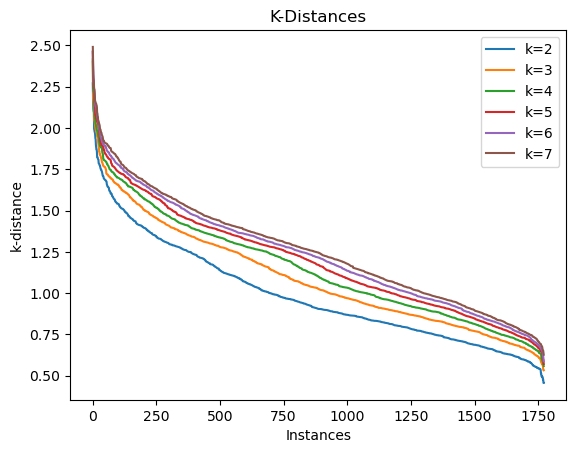

In [4]:
"""
Use k-distances to determine min_pts and eps
k = min_pts - 1
"""
k_list = [2, 3, 4, 5, 6, 7]
dbscan_kdist_analysis(args=(k_list, df))

## Assign the clusters

In [5]:
eps_list = [1.3]
k = 3
min_pts = k + 1

assigned_clusters = assign_dbscan_multidensity(args=(eps_list, min_pts, df.copy()))
assigned_clusters.to_csv(f"../data/cohort_clusters_dbscan.csv")
assigned_clusters

DBSCAN run:0 eps:1.3 n:1773


ID
0       1000
1       1000
2       1001
3       1002
4         -1
        ... 
1768    1005
1769    1000
1770    1001
1771      -1
1772    1005
Name: cluster, Length: 1773, dtype: int64

In [6]:
assigned_clusters.value_counts()

 1001    457
-1       372
 1002    304
 1000    258
 1005    194
 1003     83
 1008     43
 1004     22
 1006     14
 1009     10
 1011      6
 1007      5
 1010      5
Name: cluster, dtype: int64

## Generate the COS

In [7]:
# Get the cluster label for COS
cos_label = assigned_clusters.value_counts().index[0]
cos_label

1001

In [8]:
# Load the original dataset with the unscaled features
df_original = pd.read_csv("../data/cohort_processed.csv", index_col=0)
df_original.index.name = "ID"

In [9]:
df_cluster = pd.merge(left=df_original, right=assigned_clusters, on="ID")
cos = df_cluster[df_cluster["cluster"] == cos_label].drop(columns=["cluster"])
cos.to_csv("../data/cos_features_dbscan.csv")
cos

,subject_id,hadm_id,stay_id,n_stays,sum_los,admission_age,suspected_infection,weight,height,heart_rate_min,...,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,gender_F,gender_M,ventilation_status_HFNC,ventilation_status_InvasiveVent,ventilation_status_NonInvasiveVent,ventilation_status_None,ventilation_status_SupplementalOxygen,ventilation_status_Tracheostomy
ID,,,,,,,,,,,,,,,,,,,,,
2,10021487,28998349,38197705,1,15.67,43,1.0,143.000000,185.0,99.0,...,0,0,0,1,0,1,0,0,1,0
7,10048001,28426278,31975834,1,4.63,64,1.0,95.100000,180.0,70.0,...,0,0,0,1,0,0,0,0,1,0
13,10064854,20184139,34896096,1,15.00,83,1.0,71.300000,173.0,102.0,...,0,0,0,1,1,1,0,0,1,0
15,10076526,23108527,34659580,1,8.75,50,1.0,75.250000,175.0,99.0,...,0,0,0,1,0,1,0,0,1,0
16,10093718,21604509,31841674,1,7.67,41,1.0,84.000000,173.0,50.0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,19937374,29175646,36709438,1,21.00,49,1.0,87.000000,173.0,53.0,...,0,0,0,1,0,1,0,0,1,1
1764,19970265,24514478,38356273,1,15.04,20,1.0,67.900000,175.0,89.0,...,0,0,0,1,0,1,0,0,0,1
1765,19970491,22119205,38881623,1,3.71,57,1.0,72.500000,168.0,63.0,...,0,0,0,1,0,1,0,0,1,0


In [10]:
cos.describe(include="all")

,subject_id,hadm_id,stay_id,n_stays,sum_los,admission_age,suspected_infection,weight,height,heart_rate_min,...,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,gender_F,gender_M,ventilation_status_HFNC,ventilation_status_InvasiveVent,ventilation_status_NonInvasiveVent,ventilation_status_None,ventilation_status_SupplementalOxygen,ventilation_status_Tracheostomy
count,4.570000e+02,4.570000e+02,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,...,457.0,457.0,457.0,457.0,457.000000,457.000000,457.000000,457.000000,457.00000,457.000000
mean,1.488672e+07,2.519686e+07,3.480790e+07,1.172867,10.941335,55.984683,0.943107,92.015737,176.177462,73.964989,...,0.0,0.0,0.0,1.0,0.052516,0.940919,0.037199,0.004376,0.85558,0.115974
std,2.915699e+06,2.959270e+06,2.877052e+06,0.452439,8.080177,16.409834,0.231891,24.064849,7.503119,18.527211,...,0.0,0.0,0.0,0.0,0.223310,0.236035,0.189457,0.066082,0.35190,0.320544
min,1.002149e+07,2.000136e+07,3.000756e+07,1.000000,3.380000,19.000000,0.000000,45.800000,152.000000,30.000000,...,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.222252e+07,2.259975e+07,3.219719e+07,1.000000,4.960000,44.000000,1.000000,74.800000,173.000000,61.000000,...,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
50%,1.488824e+07,2.543226e+07,3.485212e+07,1.000000,8.290000,57.000000,1.000000,87.900000,178.000000,72.000000,...,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
75%,1.733685e+07,2.781336e+07,3.714436e+07,1.000000,14.880000,68.000000,1.000000,104.000000,180.000000,87.000000,...,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
max,1.998554e+07,2.999962e+07,3.997904e+07,4.000000,49.130000,90.000000,1.000000,227.000000,203.000000,126.000000,...,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
